
---
IMPORTING LIBRARIES


---



In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC # regression and classificication
from sklearn.naive_bayes import GaussianNB  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

**Reading the training Data**

In [2]:
DATA_PATH = "music_train.csv"

df = pd.read_csv(DATA_PATH)

In [3]:
df

,artist,title,genre,mood,year
0,Casual,I Didn't Mean To,Hip Hop/Rap,sad,1994.0
1,Adam Ant,Something Girls,Rock,happy,1982.0
2,Gob,Face the Ashes,Rock,sad,2007.0
3,Lionel Richie,Tonight Will Be Alright,R&B,happy,1986.0
4,Blue Rodeo,Floating,Rock,sad,1987.0
...,...,...,...,...,...
694,The Gathering,Gaya's Dream,Electronic,sad,2001.0
695,Jefferson Starship,Fading Lady Light,Rock,happy,1979.0
696,Amy Winehouse,Valerie,R&B,sad,2007.0
697,Eazy-E,I'mma Break It Down,Hip Hop/Rap,sad,1988.0



---


**DATAPREPROCESSING**

---



In [4]:
df=df.ffill()

In [5]:
df.isna().sum()

artist    0
title     0
genre     0
mood      0
year      0
dtype: int64

CHECKING FOR BALANCED DATA SET

In [6]:
genre_counts = df["genre"].value_counts()
genre_counts.values

array([378,  69,  63,  50,  38,  29,  27,  13,  13,  11,   7,   1],
      dtype=int64)

Sort Data

In [7]:
data=df

Encoding the target value into numerical value using LabelEncoder

In [8]:
data['year_bins']=pd.cut(x=data['year'],bins=[1900,1975,1980,1985,1990,1995,2000,2005,2010,2015])
print(data)

                 artist                                              title  \
0                Casual                                   I Didn't Mean To   
1              Adam Ant                                    Something Girls   
2                   Gob                                     Face the Ashes   
3         Lionel Richie                            Tonight Will Be Alright   
4            Blue Rodeo                                           Floating   
..                  ...                                                ...   
694       The Gathering                                       Gaya's Dream   
695  Jefferson Starship                                  Fading Lady Light   
696       Amy Winehouse                                            Valerie   
697              Eazy-E                                I'mma Break It Down   
698           Heaven 17  Come Live With Me (12'' Extended Version) (200...   

           genre   mood    year     year_bins  
0    Hip Hop/Ra

In [9]:
encoder = LabelEncoder()
data["genre_id"] = encoder.fit_transform(data["genre"])
data["mood_id"] = encoder.fit_transform(data["mood"])
data["time_period"] = encoder.fit_transform(data["year_bins"])

In [10]:
data

,artist,title,genre,mood,year,year_bins,genre_id,mood_id,time_period
0,Casual,I Didn't Mean To,Hip Hop/Rap,sad,1994.0,"(1990, 1995]",5,1,4
1,Adam Ant,Something Girls,Rock,happy,1982.0,"(1980, 1985]",9,0,2
2,Gob,Face the Ashes,Rock,sad,2007.0,"(2005, 2010]",9,1,7
3,Lionel Richie,Tonight Will Be Alright,R&B,happy,1986.0,"(1985, 1990]",8,0,3
4,Blue Rodeo,Floating,Rock,sad,1987.0,"(1985, 1990]",9,1,3
...,...,...,...,...,...,...,...,...,...
694,The Gathering,Gaya's Dream,Electronic,sad,2001.0,"(2000, 2005]",4,1,6
695,Jefferson Starship,Fading Lady Light,Rock,happy,1979.0,"(1975, 1980]",9,0,1
696,Amy Winehouse,Valerie,R&B,sad,2007.0,"(2005, 2010]",8,1,7
697,Eazy-E,I'mma Break It Down,Hip Hop/Rap,sad,1988.0,"(1985, 1990]",5,1,3


In [11]:
data.isna().sum()

artist         0
title          0
genre          0
mood           0
year           0
year_bins      0
genre_id       0
mood_id        0
time_period    0
dtype: int64

In [12]:
#data1=data.drop("artist", axis=1)

In [13]:
data1=data.drop(["artist","title","genre","mood","year","year_bins"], axis=1)

In [14]:
data1

,genre_id,mood_id,time_period
0,5,1,4
1,9,0,2
2,9,1,7
3,8,0,3
4,9,1,3
...,...,...,...
694,4,1,6
695,9,0,1
696,8,1,7
697,5,1,3


# ---

**TRAINING**

---



In [15]:
X = data1.drop('genre_id', axis = 1)
y = data1['genre_id']
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.3, random_state = 24)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")


Train: (489, 2), (489,)
Test: (210, 2), (210,)


In [16]:

# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
 
# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("___"*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


__________________________________________________________________________________________
SVC
Scores: [0.54285714 0.54285714 0.54285714 0.54285714 0.54285714 0.54285714
 0.54285714 0.52857143 0.52857143 0.55072464]
Mean Score: 0.5407867494824016
__________________________________________________________________________________________
Gaussian NB
Scores: [0.48571429 0.45714286 0.41428571 0.22857143 0.47142857 0.48571429
 0.5        0.4        0.52857143 0.46376812]
Mean Score: 0.44351966873706006


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,


__________________________________________________________________________________________
Random Forest
Scores: [0.54285714 0.54285714 0.54285714 0.54285714 0.54285714 0.54285714
 0.54285714 0.52857143 0.52857143 0.55072464]
Mean Score: 0.5407867494824016


Accuracy on train data by SVM Classifier: 54.19222903885481
Accuracy on test data by SVM Classifier: 53.80952380952381


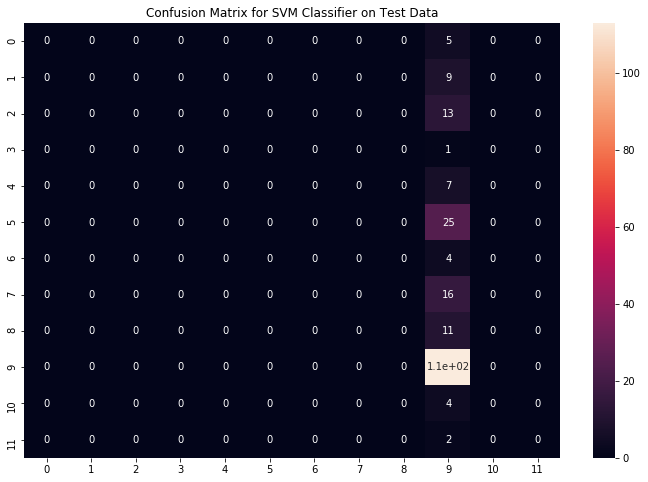

Accuracy on train data by Naive Bayes Classifier: 34.151329243353786
Accuracy on test data by Naive Bayes Classifier: 31.9047619047619


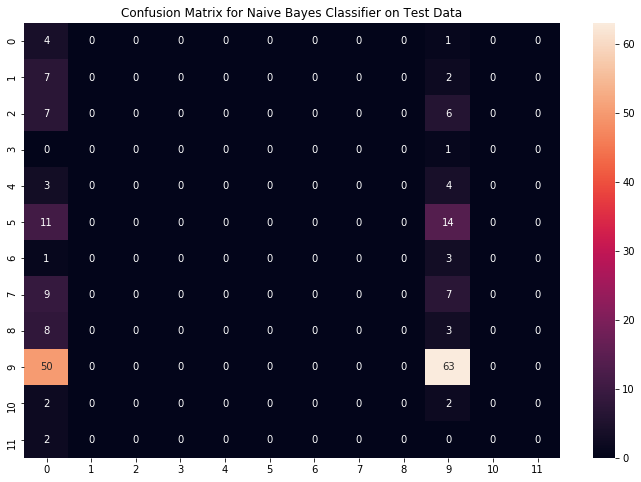

Accuracy on train data by Random Forest Classifier: 54.19222903885481
Accuracy on test data by Random Forest Classifier: 53.80952380952381


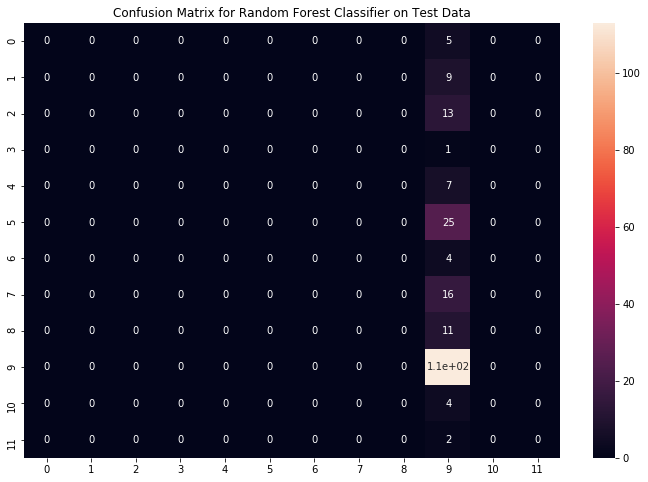

In [17]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
cfm_plot1=sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()
cfm_plot1.figure.savefig("Confusion Matrix for SVM Classifier.png")

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
cfm_plot2=sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()
cfm_plot2.figure.savefig("Confusion Matrix for Naive Bayes Classifier.png")

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
cfm_plot3=sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()
cfm_plot3.figure.savefig("Confusion Matrix for Random Forest Classifier.png")


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [19]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
matrix =classification_report(y_test,pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        25
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        11
           9       0.54      1.00      0.70       113
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2

    accuracy                           0.54       210
   macro avg       0.04      0.08      0.06       210
weighted avg       0.29      0.54      0.38       210



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



---

**TESTING**

---



In [52]:

# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)
 
# Reading the test data
test_data = pd.read_csv("music_test.csv")

PREPROCESSING OF TEST DATA

In [53]:
test_data.info

<bound method DataFrame.info of      index               artist                        title    genre   mood  \
0        1          Faron Young     It's Four In The Morning  Country    sad   
1        2         Dixie Chicks      Give It Up Or Let Me Go  Country  happy   
2        3         Loretta Lynn        I'd Rather Have Jesus      NaN    sad   
3        4        Fake Problems              Tabernacle Song     Rock    sad   
4        5           Eurythmics              A Little Of You      Pop    sad   
..     ...                  ...                          ...      ...    ...   
296    297                 Sade           All About Our Love      R&B    sad   
297    298      New Found Glory  Don't Let Her Pull You Down     Rock  happy   
298    299       Mindy McCready          Ten Thousand Angels  Country  happy   
299    300         Joy Division               Leaders Of Men     Rock    sad   
300    301  Seventh Day Slumber               Shattered Life     Rock    sad   

     ye

In [54]:
test_data.head()

,index,artist,title,genre,mood,year
0,1,Faron Young,It's Four In The Morning,Country,sad,1986
1,2,Dixie Chicks,Give It Up Or Let Me Go,Country,happy,1998
2,3,Loretta Lynn,I'd Rather Have Jesus,NaN,sad,1965
3,4,Fake Problems,Tabernacle Song,Rock,sad,2009
4,5,Eurythmics,A Little Of You,Pop,sad,1986


In [55]:
test_data=test_data.ffill()

In [56]:
test_data['year_bins']=pd.cut(x=test_data['year'],bins=[1900,1975,1980,1985,1990,1995,2000,2005,2010,2015])
print(test_data)

     index               artist                        title    genre   mood  \
0        1          Faron Young     It's Four In The Morning  Country    sad   
1        2         Dixie Chicks      Give It Up Or Let Me Go  Country  happy   
2        3         Loretta Lynn        I'd Rather Have Jesus  Country    sad   
3        4        Fake Problems              Tabernacle Song     Rock    sad   
4        5           Eurythmics              A Little Of You      Pop    sad   
..     ...                  ...                          ...      ...    ...   
296    297                 Sade           All About Our Love      R&B    sad   
297    298      New Found Glory  Don't Let Her Pull You Down     Rock  happy   
298    299       Mindy McCready          Ten Thousand Angels  Country  happy   
299    300         Joy Division               Leaders Of Men     Rock    sad   
300    301  Seventh Day Slumber               Shattered Life     Rock    sad   

     year     year_bins  
0    1986  (1

In [57]:
test_data["genre_id"] = encoder.fit_transform(test_data["genre"])
test_data["mood_id"] = encoder.fit_transform(test_data["mood"])
test_data["time_period"] = encoder.fit_transform(test_data["year_bins"])

In [58]:
test_data1=test_data.drop(["artist","title","genre","mood","year","year_bins","index"], axis=1)

In [59]:
test_data1

,genre_id,mood_id,time_period
0,2,1,3
1,2,0,5
2,2,1,0
3,8,1,7
4,6,1,3
...,...,...,...
296,7,1,5
297,8,0,7
298,2,0,5
299,8,1,1


Accuracy on Test dataset by the combined model: 1.3289036544850499


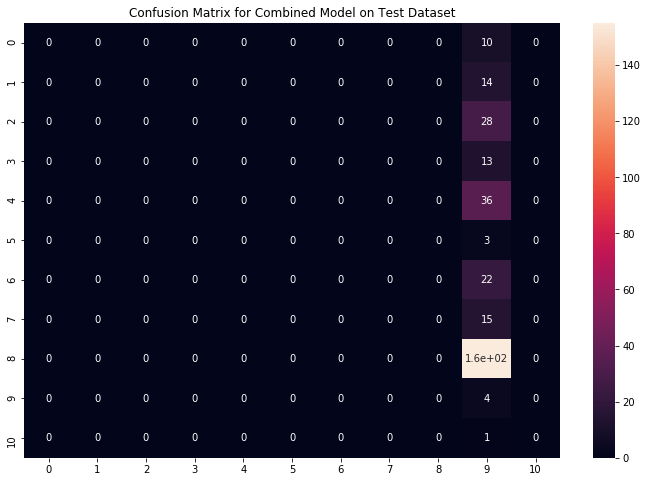

In [60]:
test_X = test_data1.drop('genre_id', axis = 1)
test_Y = encoder.fit_transform(test_data1['genre_id'])
 
# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)
 
final_preds = [mode([i,j,k])[0][0] for i,j,
               k in zip(svm_preds, nb_preds, rf_preds)]
 
print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")
 
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
 
cfm_plot4=sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()
cfm_plot4.figure.savefig("Confusion Matrix for Combined Model on Test Dataset.png")


In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
test_data1

,genre_id,mood_id,time_period
0,2,1,3
1,2,0,5
2,2,1,0
3,8,1,7
4,6,1,3
...,...,...,...
296,7,1,5
297,8,0,7
298,2,0,5
299,8,1,1


In [32]:
symptoms = X.columns.values
print(symptoms)
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i for i in value.split(" ")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
     
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

        print(input_data[index])
         
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    print(input_data)
    # generating individual outputs
    print("fk",final_rf_model.predict(input_data)[0])
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]-2]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]-2]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]-2]
     
    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]

    
    print({"Random Forest Prediction": rf_prediction})
    print("_"*30)
    print({"Naive Bayes Prediction": nb_prediction})
    print("_"*30)
    print({"SVM Model Prediction": svm_prediction})
    print("_"*30)
    print({"Final Prediction": final_prediction})
    print("_"*30)


# Testing the function
predictDisease("1,3")

['mood_id' 'time_period']


In [63]:
test_data1

,genre_id,mood_id,time_period
0,2,1,3
1,2,0,5
2,2,1,0
3,8,1,7
4,6,1,3
...,...,...,...
296,7,1,5
297,8,0,7
298,2,0,5
299,8,1,1


In [64]:
test_data2=test_data
test_data2.head()

,index,artist,title,genre,mood,year,year_bins,genre_id,mood_id,time_period
0,1,Faron Young,It's Four In The Morning,Country,sad,1986,"(1985, 1990]",2,1,3
1,2,Dixie Chicks,Give It Up Or Let Me Go,Country,happy,1998,"(1995, 2000]",2,0,5
2,3,Loretta Lynn,I'd Rather Have Jesus,Country,sad,1965,"(1900, 1975]",2,1,0
3,4,Fake Problems,Tabernacle Song,Rock,sad,2009,"(2005, 2010]",8,1,7
4,5,Eurythmics,A Little Of You,Pop,sad,1986,"(1985, 1990]",6,1,3


Text(0.5, 1.0, 'ScatterPlot based on music Genres')

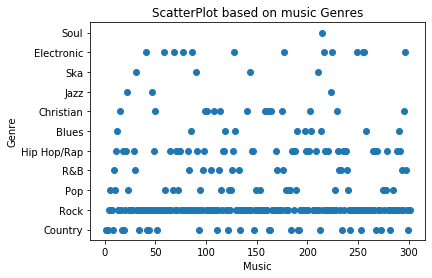

In [65]:
#scatter plot for the given data without KMode
plt.scatter(test_data2['index'],test_data2['genre'])
plt.xlabel("Music")
plt.ylabel("Genre")
plt.title("ScatterPlot based on music Genres")

In [66]:
from kmodes.kmodes import KModes
# Building the model with 7 clusters
kmode = KModes(n_clusters=7, init = "random", n_init = 50)
clusters = kmode.fit_predict(test_data2)
clusters

array([0, 6, 0, 1, 0, 5, 1, 6, 3, 0, 4, 1, 2, 2, 0, 4, 3, 2, 0, 6, 0, 1,
       1, 5, 5, 1, 0, 5, 5, 2, 5, 1, 2, 0, 5, 1, 2, 2, 5, 0, 2, 6, 5, 5,
       4, 5, 5, 0, 0, 1, 2, 6, 0, 0, 3, 0, 4, 1, 6, 1, 0, 4, 4, 0, 5, 6,
       2, 5, 2, 0, 4, 2, 2, 1, 5, 1, 4, 5, 0, 1, 4, 0, 1, 1, 6, 1, 1, 4,
       2, 0, 2, 2, 3, 3, 2, 3, 5, 2, 1, 2, 2, 2, 5, 5, 3, 2, 1, 2, 5, 1,
       6, 4, 0, 5, 4, 1, 0, 1, 0, 5, 0, 0, 5, 1, 2, 1, 5, 6, 0, 1, 1, 0,
       5, 4, 5, 2, 0, 0, 1, 0, 1, 4, 6, 0, 4, 0, 0, 0, 0, 0, 3, 1, 2, 0,
       3, 3, 2, 1, 5, 0, 2, 3, 6, 2, 5, 0, 4, 0, 0, 1, 4, 1, 5, 2, 0, 4,
       0, 1, 5, 2, 5, 0, 0, 5, 0, 1, 0, 2, 6, 4, 0, 6, 0, 2, 2, 0, 1, 4,
       2, 6, 2, 4, 0, 4, 0, 0, 1, 2, 0, 4, 0, 6, 3, 4, 0, 2, 5, 4, 2, 5,
       1, 4, 5, 0, 5, 0, 1, 1, 0, 2, 2, 0, 5, 3, 2, 5, 0, 0, 4, 5, 0, 5,
       4, 5, 2, 5, 5, 1, 2, 1, 1, 3, 2, 0, 1, 4, 5, 2, 2, 2, 0, 2, 1, 0,
       1, 5, 0, 3, 1, 4, 1, 5, 5, 6, 5, 3, 1, 0, 2, 1, 5, 2, 2, 0, 0, 1,
       0, 5, 1, 3, 2, 1, 3, 2, 0, 2, 0, 1, 6, 0, 5]

In [67]:
test_data2.insert(10, "Cluster", clusters, True)

In [68]:
test_data2.head()

,index,artist,title,genre,mood,year,year_bins,genre_id,mood_id,time_period,Cluster
0,1,Faron Young,It's Four In The Morning,Country,sad,1986,"(1985, 1990]",2,1,3,0
1,2,Dixie Chicks,Give It Up Or Let Me Go,Country,happy,1998,"(1995, 2000]",2,0,5,6
2,3,Loretta Lynn,I'd Rather Have Jesus,Country,sad,1965,"(1900, 1975]",2,1,0,0
3,4,Fake Problems,Tabernacle Song,Rock,sad,2009,"(2005, 2010]",8,1,7,1
4,5,Eurythmics,A Little Of You,Pop,sad,1986,"(1985, 1990]",6,1,3,0


In [69]:
test_data2['Cluster'].unique()

array([0, 6, 1, 5, 3, 4, 2], dtype=uint16)

Text(0.5, 1.0, 'ScatterPlot based on Music Genres with Cluster')

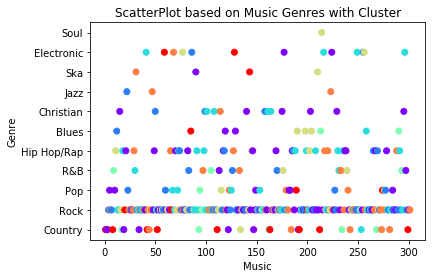

In [72]:
plt.scatter(test_data2['index'],test_data2["genre"], c=test_data2['Cluster'], cmap='rainbow')
plt.xlabel("Music")
plt.ylabel("Genre")
plt.title("ScatterPlot based on Music Genres with Cluster")

In [76]:
import random
import time
import re
from  textblob import TextBlob
a=0
c=7
def mood_analyser(Comment):
    sentimentText = TextBlob(Comment)
    sentiment= sentimentText.sentiment.polarity
    pos=0
    neg=0
    if (sentiment <0):
        mood1 = 'sad' 
        neg=neg+1
    if (sentiment>=0):
        mood1 = 'happy'
        pos=pos+1
    return mood1
Comment=input("Input Social Media Comment:\n")
mood1=mood_analyser(Comment)
print('\n')
print("You feel",mood1,'today!')
text= input("What songs are you listening to? \n")
for i in range(len(test_data2['title'])):
    if(text==test_data2['title'][i]):
        print('Searching for Songs that you may like...')
        c=test_data2['Cluster'][i]
        a=0
        break
    else:
        a=a+1
if(a !=0):
    print("Music Not Found In The Database")
if(c<7):
    data2=test_data2.loc[test_data2['Cluster']==c]
    data3=data2.loc[test_data2['mood']==mood1]
    data4 = data3.sample(n=5)
    print(data4['title'])
else:
    print('Search for Another Song')

Input Social Media Comment:
i failed my exam


You feel sad today!
What songs are you listening to? 
A Little Of You
Searching for Songs that you may like...
47     Away From The Sky
195                 War?
81           Kill Niggaz
286             Patience
210          Marvel Hill
Name: title, dtype: object
